<a href="https://colab.research.google.com/github/AmirahTech/Social-Media-Engagement-Prediction/blob/main/social_media_engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

project: predicts whether a social media post will have high engagement

dataset: public kaggle dataset with posts from instagram, twitter,reddit,youtube.

features used: sentiment,text length,platform,brand

model and performance: random forest achieved 52% accuracy

insights: longer posts tend to have slightly higher engagement
platform and brand affect engagement distribution

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()  # open file selector

# Read CSV into dataframe
df = pd.read_csv(list(uploaded.keys())[0])
df.head()
df.columns

Saving archive.zip to archive (2).zip


Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
       'location', 'language', 'text_content', 'hashtags', 'mentions',
       'keywords', 'topic_category', 'sentiment_score', 'sentiment_label',
       'emotion_type', 'toxicity_score', 'likes_count', 'shares_count',
       'comments_count', 'impressions', 'engagement_rate', 'brand_name',
       'product_name', 'campaign_name', 'campaign_phase',
       'user_past_sentiment_avg', 'user_engagement_growth',
       'buzz_change_rate'],
      dtype='object')

In [ ]:

# Create engagement_score
df['engagement_score'] = df['likes_count'] + df['shares_count'] + df['comments_count']

# Create binary target: high_engagement based on median
median_score = df['engagement_score'].median()
df['high_engagement'] = (df['engagement_score'] > median_score).astype(int)

# Text length feature
df['text_length'] = df['text_content'].apply(len)

# Count hashtags and mentions
df['hashtag_count'] = df['hashtags'].apply(lambda x: len(str(x).split(',')))
df['mention_count'] = df['mentions'].apply(lambda x: len(str(x).split(',')))

# Extract posting hour from timestamp
df['post_hour'] = pd.to_datetime(df['timestamp']).dt.hour

In [ ]:
df_encoded = pd.get_dummies(df, columns=['platform','brand_name'], drop_first=True)

In [ ]:
numeric_features = ['sentiment_score', 'text_length', 'hashtag_count', 'mention_count', 'post_hour']
categorical_features = [col for col in df_encoded.columns if 'platform_' in col or 'brand_name_' in col]

X = df_encoded[numeric_features + categorical_features]
y = df_encoded['high_engagement']

X.head()
y.head()

,high_engagement
0,0
1,0
2,1
3,0
4,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training/Test Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Training/Test Shapes: (9600, 18) (2400, 18) (9600,) (2400,)


In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 0.5175
              precision    recall  f1-score   support

           0       0.52      0.57      0.54      1203
           1       0.52      0.47      0.49      1197

    accuracy                           0.52      2400
   macro avg       0.52      0.52      0.52      2400
weighted avg       0.52      0.52      0.52      2400

Confusion Matrix:
 [[683 520]
 [638 559]]


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.5233333333333333
              precision    recall  f1-score   support

           0       0.52      0.57      0.55      1203
           1       0.52      0.48      0.50      1197

    accuracy                           0.52      2400
   macro avg       0.52      0.52      0.52      2400
weighted avg       0.52      0.52      0.52      2400

Confusion Matrix:
 [[686 517]
 [627 570]]


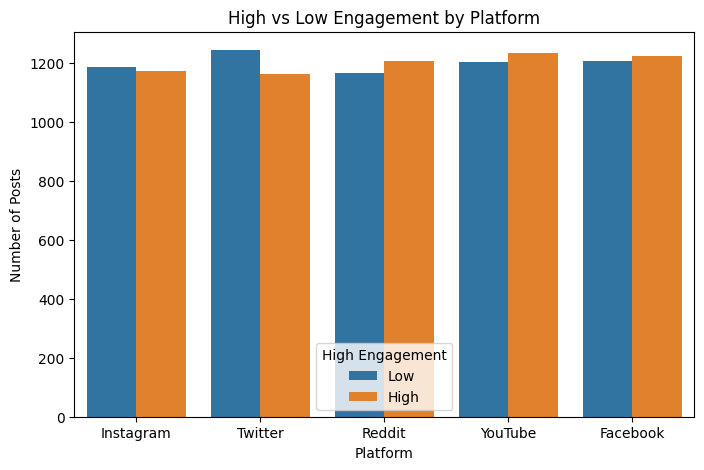

In [ ]:
# High vs Low Engagement by Platform
plt.figure(figsize=(8,5))
sns.countplot(x='platform', hue='high_engagement', data=df)
plt.title('High vs Low Engagement by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.legend(title='High Engagement', labels=['Low','High'])
plt.show()


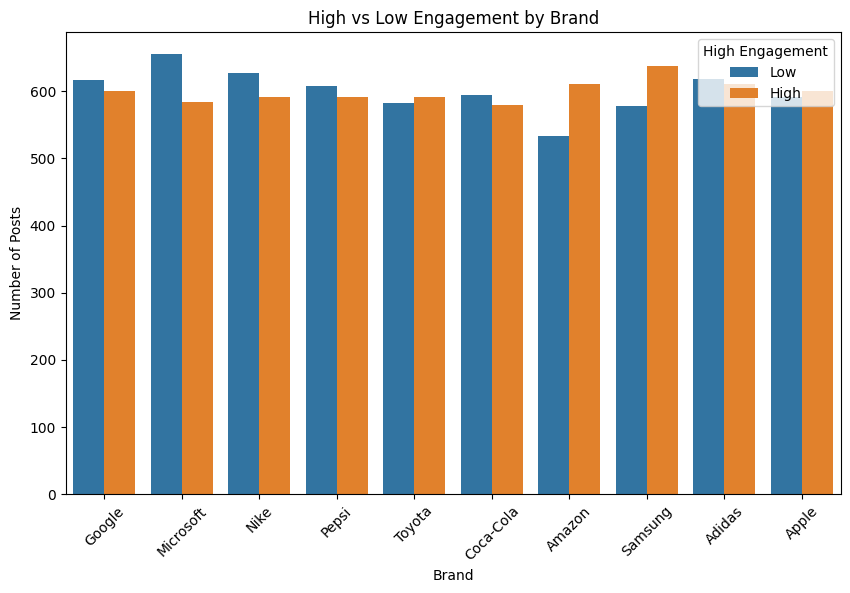

In [ ]:
# High vs Low Engagement by Brand
plt.figure(figsize=(10,6))
sns.countplot(x='brand_name', hue='high_engagement', data=df)
plt.title('High vs Low Engagement by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='High Engagement', labels=['Low','High'])
plt.show()


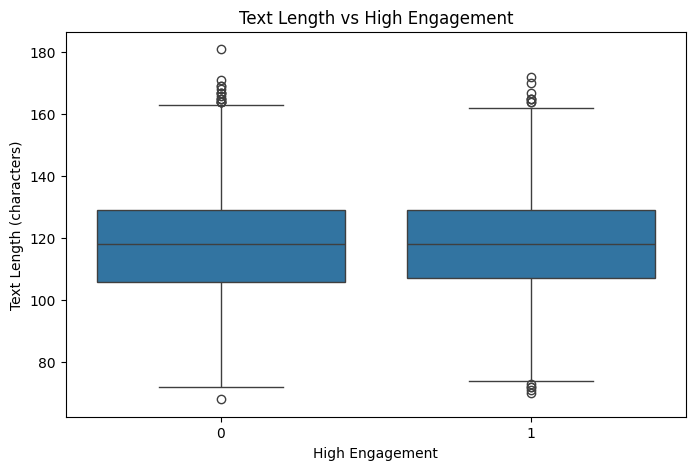

In [ ]:
# Text Length vs Engagement
plt.figure(figsize=(8,5))
sns.boxplot(x='high_engagement', y='text_length', data=df)
plt.title('Text Length vs High Engagement')
plt.xlabel('High Engagement')
plt.ylabel('Text Length (characters)')
plt.show()



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.495
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      1203
           1       0.49      0.48      0.49      1197

    accuracy                           0.49      2400
   macro avg       0.49      0.49      0.49      2400
weighted avg       0.49      0.49      0.49      2400

Confusion Matrix:
 [[617 586]
 [626 571]]


In [ ]:
# Add new numeric features to df_encoded
df_encoded['hashtag_count'] = df['hashtags'].apply(lambda x: len(str(x).split(',')))
df_encoded['mention_count'] = df['mentions'].apply(lambda x: len(str(x).split(',')))
df_encoded['post_hour'] = pd.to_datetime(df['timestamp']).dt.hour



In [ ]:
numeric_features = ['sentiment_score', 'text_length', 'hashtag_count', 'mention_count', 'post_hour']
categorical_features = [col for col in df_encoded.columns if 'platform_' in col or 'brand_name_' in col]

X = df_encoded[numeric_features + categorical_features]
y = df_encoded['high_engagement']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = rf_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5233333333333333
              precision    recall  f1-score   support

           0       0.52      0.57      0.55      1203
           1       0.52      0.48      0.50      1197

    accuracy                           0.52      2400
   macro avg       0.52      0.52      0.52      2400
weighted avg       0.52      0.52      0.52      2400

Confusion Matrix:
 [[686 517]
 [627 570]]


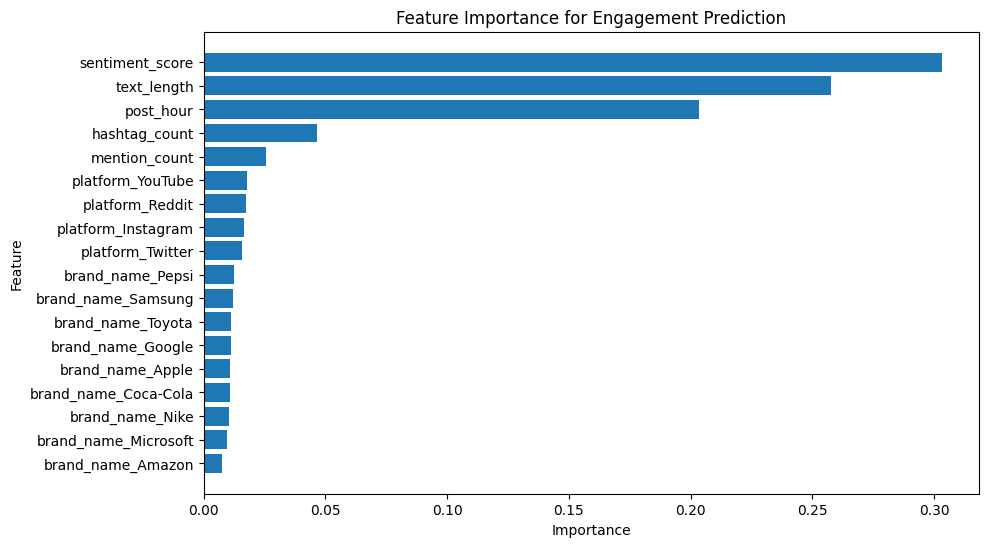

In [29]:
# Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Engagement Prediction')
plt.gca().invert_yaxis()
plt.show()